In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from functions.stock import download_stock_data
from const.interval import Interval

In [2]:
#codigos_de_negociacao = ["BBAS3.SA", "PETR4.SA", "VALE3.SA"]

stock_data = download_stock_data("BBAS3.SA", Interval.DAY.value, 365)

[*********************100%***********************]  1 of 1 completed


In [3]:
df_bbas3 = stock_data

df_bbas3['Adj Close_next_day'] = stock_data['Adj Close'].shift(-1)

In [4]:
df_bbas3 = df_bbas3.drop(df_bbas3.index[-1])
df_bbas3.dropna

<bound method DataFrame.dropna of                  Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2023-01-23  40.070000  41.250000  39.130001  39.770000  36.703777  29114500   
2023-01-24  39.770000  40.389999  39.279999  39.570000  36.519196  16577900   
2023-01-25  39.410000  40.990002  38.869999  40.650002  37.515934  15233000   
2023-01-26  40.779999  41.480000  40.570000  40.630001  37.497475  13150700   
2023-01-27  40.919998  40.959999  39.689999  40.180000  37.082169  12428300   
...               ...        ...        ...        ...        ...       ...   
2024-01-12  54.799999  55.200001  54.310001  55.119999  55.119999   5063300   
2024-01-15  55.099998  56.200001  55.000000  56.200001  56.200001   8413800   
2024-01-16  55.959999  56.470001  55.770000  55.880001  55.880001   8972200   
2024-01-17  55.810001  56.099998  55.630001  55.990002  55.990002   9683100   
2024-01-18  56.049

In [5]:
display(df_bbas3)

,Open,High,Low,Close,Adj Close,Volume,Adj Close_next_day
Date,,,,,,,
2023-01-23,40.070000,41.250000,39.130001,39.770000,36.703777,29114500,36.519196
2023-01-24,39.770000,40.389999,39.279999,39.570000,36.519196,16577900,37.515934
2023-01-25,39.410000,40.990002,38.869999,40.650002,37.515934,15233000,37.497475
2023-01-26,40.779999,41.480000,40.570000,40.630001,37.497475,13150700,37.082169
2023-01-27,40.919998,40.959999,39.689999,40.180000,37.082169,12428300,37.663593
...,...,...,...,...,...,...,...
2024-01-12,54.799999,55.200001,54.310001,55.119999,55.119999,5063300,56.200001
2024-01-15,55.099998,56.200001,55.000000,56.200001,56.200001,8413800,55.880001
2024-01-16,55.959999,56.470001,55.770000,55.880001,55.880001,8972200,55.990002


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X = df_bbas3.iloc[:, 1:-1] # Todas as colunas, exceto a última e a priemira
y = df_bbas3.iloc[:, -1] # Última coluna

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [8]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = regression_model.predict(X_test)

In [11]:
from functions.validation import performance_evaluation
test_performance = performance_evaluation(y_test, y_pred)

print("\nPerformance no Conjunto de Teste:")
for metric, value in test_performance.items():
    print(f'{metric}: {value}')


Performance no Conjunto de Teste:
Mean Squared Error (MSE): 0.47861566299615504
Median Absolute Deviation (MAD): 0.38878392562328656
Mean Absolute Error (MAE): 0.5306111168875135
R-squared (R²): 0.9860574001847139


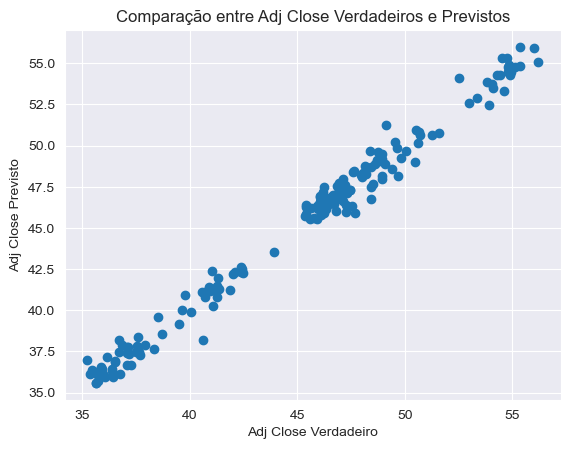

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel("Adj Close Verdadeiro")
plt.ylabel("Adj Close Previsto")
plt.title("Comparação entre Adj Close Verdadeiros e Previstos")
plt.show()

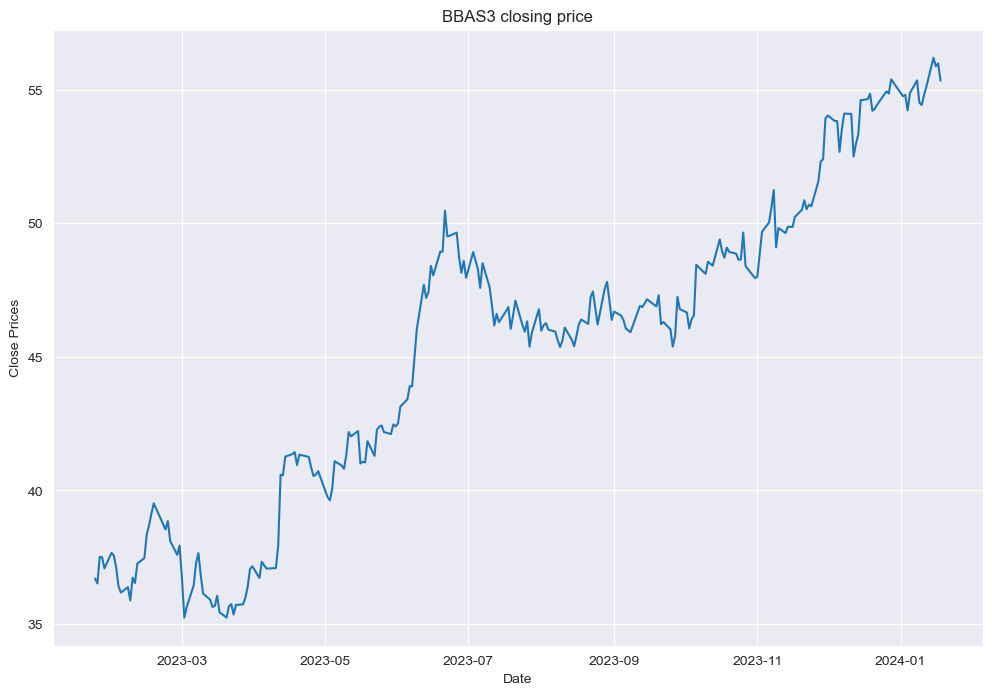

In [13]:
#plot close price
plt.figure(figsize=(12,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df_bbas3['Adj Close'])
plt.title('BBAS3 closing price')
plt.show()

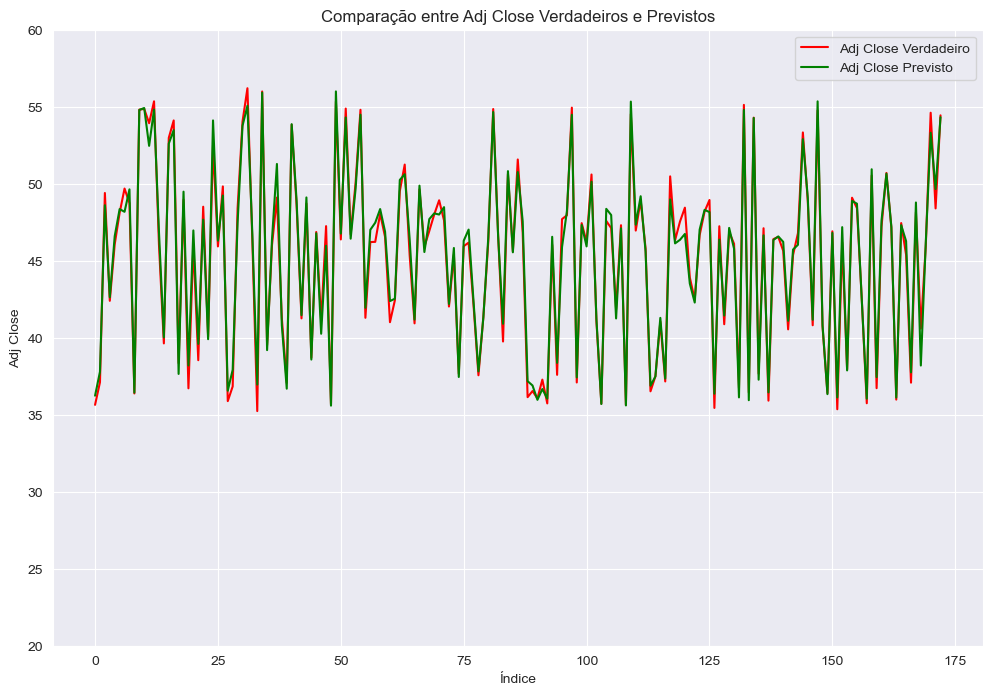

In [14]:
# Ajustar o tamanho do gráfico
plt.figure(figsize=(12, 8))

# Plotar as linhas verde e vermelha
plt.plot(y_test.values, color='red', label='Adj Close Verdadeiro')
plt.plot(y_pred, color='green', label='Adj Close Previsto')

# Adicionar rótulos e título
plt.xlabel("Índice")
plt.ylabel("Adj Close")
plt.title("Comparação entre Adj Close Verdadeiros e Previstos")

# Adicionar legenda
plt.legend()

# Definir limites do eixo y para diminuir a escala
plt.ylim(20, 60)  # Ajuste os valores conforme necessário

# Exibir o gráfico
plt.show()